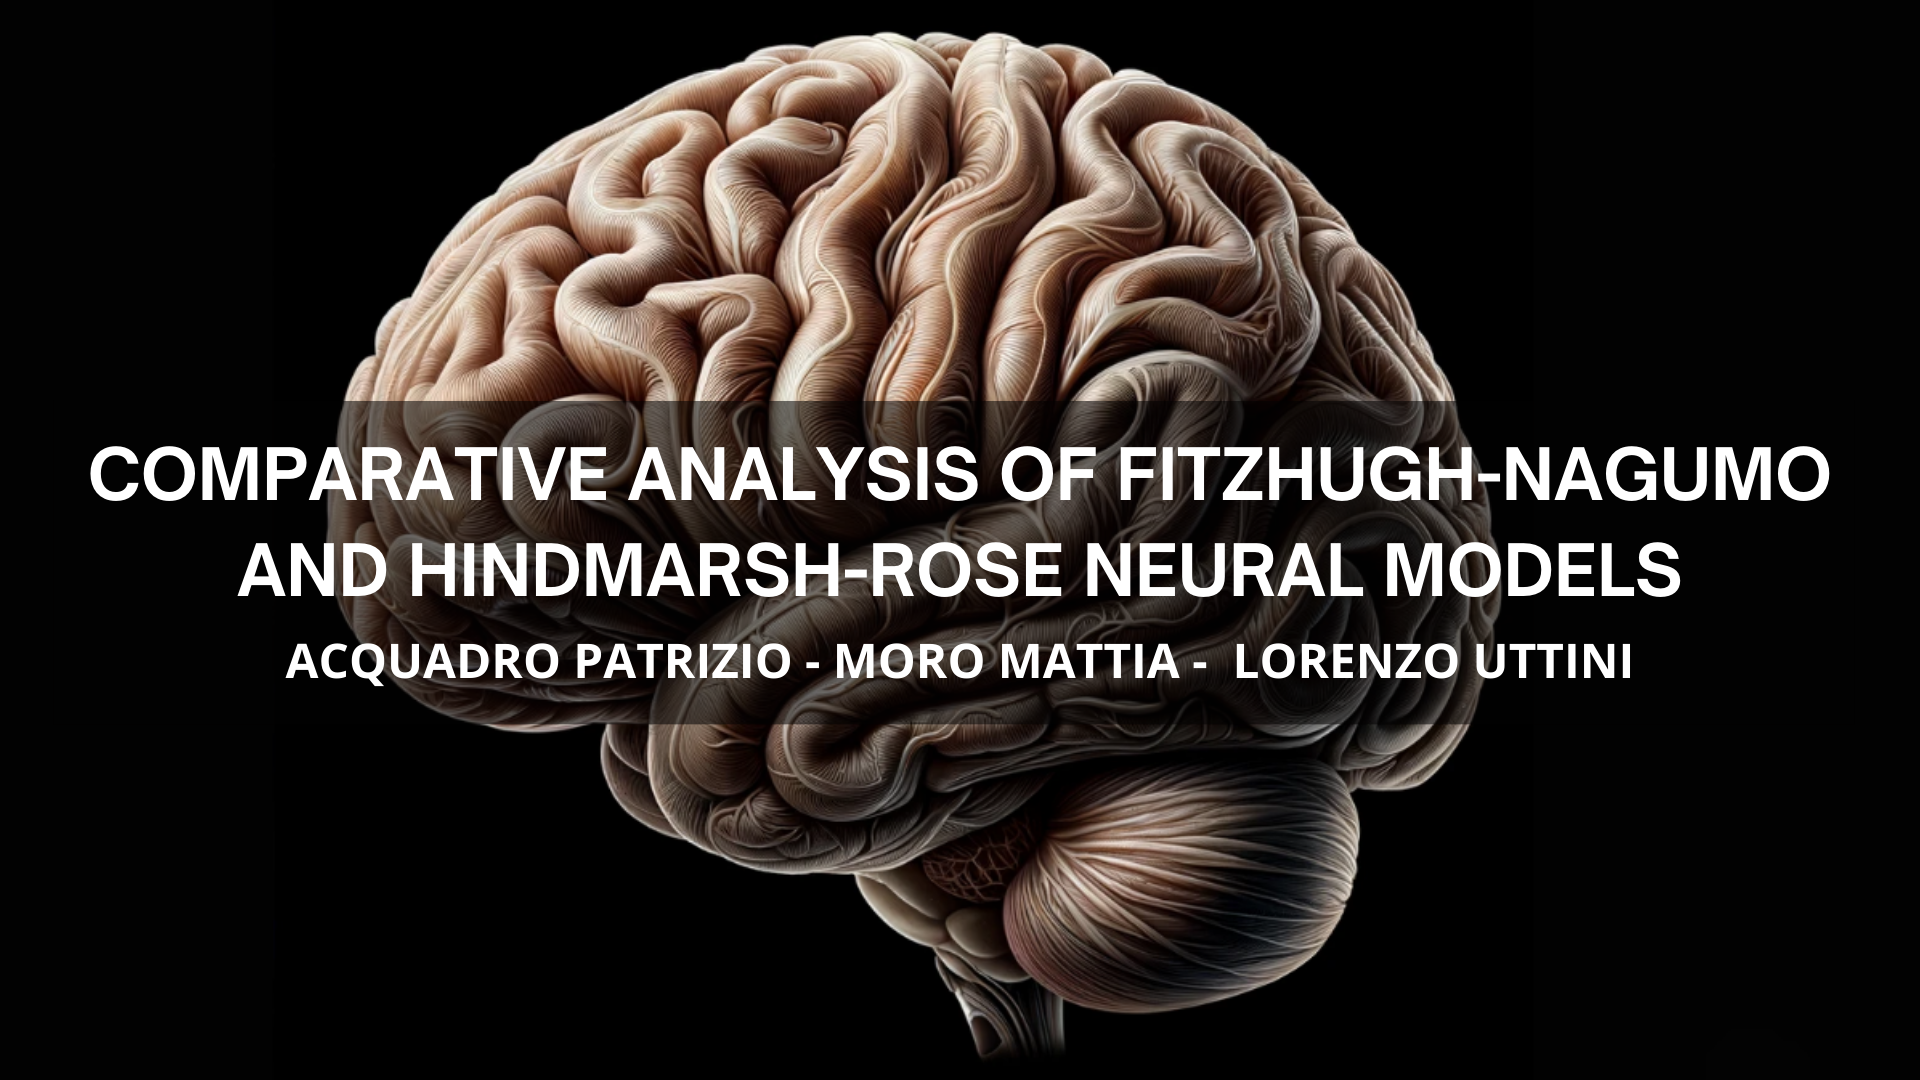

#**Brain modelling - Exam Project**

### Acquadro Patrizio - 502311, Moro Mattia - 502259, Uttini Lorenzo - 502183

The aim of this notebook is to analyze the dynamics of the Hindmarsh-Rose neural model, and compare it to the Fitzhugh-Nagumo one. In the first section we briefly revised the dynamic of the Fitzhugh-Nagumo (already covered during the lecture and taken from it), visualizing the most important insights.

Then we deeply dived in the analysis of the Hindmarsh-Rose, trying to exploit changes in the dynamics based on the input parameters.

The notebook presents then a final section with a comparison of the most important aspects of the model dynamics.

The *index* in details of the notebook is composed by 5 sections:
- **1 section**: Fitzhugh-Nagumo model is described, plotting the nullclines and the trajectories of the solutions regarding the dynamical system.
- **2 section**: Introduction of the simplified Hindmarsh-Rose model. Plotting of the nullclines and the trajectories of the system.
- **3 section**: Stability analysis of the Hindmarsh-Rose model considering different ranges of the `I_ext` parameter.
- **4 section**: Response to time-dependent external stimuli (`I_ext`).
- **5 section**: Comparison of the 2 dynamical systems about the nullclines and the trajectories.


In [ ]:
#IMPORT: importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import odeint
import sympy as sp

## **1. FitzHugh-Nagumo Model Overview**

**Model Description:**
The FitzHugh-Nagumo model is a simplified 2D representation of neuronal activity, characterized by two state variables:
- `v(t)`: Membrane potential, which represents the electrical charge across the neuron's cell membrane.
- `w(t)`: Recovery variable, accounting for the processes that restore the membrane potential to its resting state following an action potential.

**Equations of the Model:**
The behavior of the FitzHugh-Nagumo model is described by a pair of coupled first-order differential equations:
- Membrane potential dynamics: $\frac{dv}{dt} = v - \frac{v^3}{3} - w + I_{ext}$
- Recovery variable dynamics: $\frac{dw}{dt} = \frac{1}{c}(v + a - bw)$

**Nullclines of the Model:**
Nullclines are crucial analytical tools in the phase plane, representing the locations where each variable's rate of change is zero:
- **v-nullcline**: Defined by the equation $\frac{dv}{dt} = 0$, indicating all points where the membrane potential `v` is unchanging.
- **w-nullcline**: Defined by the equation $\frac{dw}{dt} = 0$, signifying all points where the recovery variable `w` is constant.

**Analytical Insights:**
- The intersection of the nullclines corresponds to the model's equilibrium points, providing significant information about the system's potential behaviors.
- Analyzing the nullclines allows for predictions of system behavior under various conditions, particularly the influence of the external current $I_{ext}$ on neuronal excitability and response patterns.

**Interactive Analysis:**
By plotting the nullclines and their intersections, researchers can dynamically explore how changes in parameters, such as $I_{ext}$, impact the system. This exploration is key for understanding phenomena like excitation, oscillation, and the transition between different states of neuronal activity.


In [ ]:
def default_pars_fn(**kwargs):
    """
    Fix the dictionary of parameters of Fitzhugh-Nagumo model.
    """
    pars={}
    pars['a'] = 0.7
    pars['b'] = 0.8
    pars['c'] = 12.5
    pars['I_ext'] = 0.2

    return pars

### **1.1 Calculating and Plotting Nullclines for the FitzHugh-Nagumo Model**

**Overview:**  
This suite of functions is dedicated to calculate and plot the nullclines for the FitzHugh-Nagumo model.

- **Function Insights:**
  - **`fn_derivs`**: Returns the derivatives of `v` and `w`, representing the rate of change of membrane potential and recovery variable, respectively.
  - **`nullclines_fn`**: Calculates the nullclines where the derivatives equal zero, indicating no change in `v` or `w`, and thus, the potential steady states.
  - **`compute_vector_field_fn`**: Constructs the vector field to visualize the flow across the phase space.
  - **`find_critical_point_fn`**: Solves the model equations to find the critical points where the nullclines intersect.
  - **`plot_nullclines_fn`**: Plots the nullclines, critical points, and vector field on the phase plane.
  - **`plot_int_nullclines_fn`**: Generates an interactive plot that allows for the dynamic adjustment of the external current `I_ext` and observation of its effects on the nullclines and critical points.

**Usage in Analysis:**
These functions provide a visual tool for analyzing the behavior of this neuron model. By plotting the nullclines, one can assess the impact of different parameters, especially the external current `I_ext`, on the neuron's activity.


In [ ]:
def fn_derivs(v,w,params):
    """
    Compute v and w derivates in the phase space (vector field).
    """
    dv_dt = v-v**3/3. - w+params['I_ext']
    dw_dt = (v+params['a']-params['b']*w)/params['c']
    return dv_dt,dw_dt

In [ ]:
def nullclines_fn(params):
    """
    Compute nullclines for v and w.
    """
    x = np.linspace(-3.,3.,100)
    v_n = x - x**3/3. + params['I_ext']
    w_n = (x + params['a'])/params['b']
    return x,v_n,w_n

def compute_vector_field_fn(params):
    """
    Compute vector field in the entire phase space to be shown.
    """
    grid = np.linspace(-3, 3, 80)
    v, w = np.meshgrid(grid, grid)
    dv_dt, dw_dt = fn_derivs(v,w,params)
    len_ = np.sqrt(dv_dt**2 + dw_dt**2)
    dv_norm = dv_dt / len_
    dw_norm = dw_dt / len_
    length = 0.1
    dv_scaled = dv_norm * length
    dw_scaled = dw_norm * length
    return v,w,dv_scaled, dw_scaled

def find_critical_point_fn(params):
    """
    Solve the system of equations to find the intesection of nullclines.
    Return the coordinates of the critical point in the phase space.
    """
    x, y = sp.symbols('x y')
    eq1 = x - x**3/3. - y + params['I_ext']
    eq2 = x + params['a'] - params['b']*y
    c_p = sp.solve((eq1, eq2), (x, y))
    return c_p[0][0],c_p[0][1]


def plot_nullclines_fn(x,v_n,w_n,cp_x,cp_y,v,w,dv_scaled,dw_scaled):
    """
    Plot nullclines and their intersection point (critical point).
    Plot also the vector field in the phase space.
    """

    n_skip = 2
    plt.figure(figsize=(8, 5))
    plt.title('Nullclines')
    plt.plot(x, v_n, label='v_nullcline')
    plt.plot(x, w_n, label='w_nullcline')
    plt.plot(cp_x,cp_y, 'r*', markersize=8,label='Critical point')
    plt.quiver(v[::n_skip, ::n_skip], w[::n_skip, ::n_skip],dv_scaled[::n_skip, ::n_skip],
               dw_scaled[::n_skip, ::n_skip],angles='xy', scale_units='xy', scale=1., facecolor='gray',width=0.002)
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend(loc='upper right')
    plt.xlim(-3,3)
    plt.ylim(-2,3)
    plt.grid(True)
    plt.show()



def plot_int_nullclines_fn(I_ext):
    """
    Plot nullclines for different values of the parameters.
    """
    params=default_pars_fn()
    params['I_ext']=I_ext
    x,v_n,w_n=nullclines_fn(params)
    cp_x,cp_y = find_critical_point_fn(params)
    v,w,dv_scaled,dw_scaled=compute_vector_field_fn(params)
    plot_nullclines_fn(x,v_n,w_n,cp_x,cp_y,v,w,dv_scaled,dw_scaled)


### **1.2 Phase Plane Analysis of the FitzHugh-Nagumo Model**

**Overview:**
The phase plane analysis provides a visual exploration of the FitzHugh-Nagumo model's dynamics. Below is a graphical representation of the model's nullclines.

**Nullclines Visualization:**
The following graph illustrates the nullclines for the FitzHugh-Nagumo model:
- The **blue line** represents the `v` nullcline, where the rate of change of the membrane potential (`dv/dt`) is zero.
- The **orange line** represents the `w` nullcline, where the rate of change of the recovery variable (`dw/dt`) is zero.
- The **red star** indicates the critical point, the intersection of the nullclines, representing a steady state of the system.

In [ ]:
_ = widgets.interact(plot_int_nullclines_fn,I_ext=(0,2,0.2))

interactive(children=(FloatSlider(value=1.0, description='I_ext', max=2.0, step=0.2), Output()), _dom_classes=…

**Impact of \($I_{ext}$\):** \\
The external current, denoted as \($I_{ext}$\), has a significant impact on the positioning of the `v` nullcline. By altering \($I_{ext}$\):
- The `v` nullcline can shift upwards or downwards.
- This shift changes the location of the critical point to the left, middle, or right segment of the `v` nullcline curve.
- The critical point's location is crucial in determining the dynamics of the membrane potential `v`, affecting whether the system exhibits excitable or oscillatory behavior.

### **1.3 Trajectory Analysis for the FitzHugh-Nagumo Model**

**Overview:**  
The following functions simulate and visualize the trajectories of the FitzHugh-Nagumo model, which maps the dynamics of neuronal activity through the interaction of the membrane potential `v` and recovery variable `w`.

- **Function Insights:**
  - **`fitzhugh_nagumo`**: Defines the differential equations of the model, taking the current state vector `x` (comprising `v` and `w`) and computing their derivatives.
  - **`solve_fn`**: Numerically integrates the differential equations over time to simulate the model's evolution from given initial conditions.
  - **`plot_results_fn`**: Generates two plots; one for the phase plane trajectory of `v` versus `w`, and another for the time series of `v(t)` and `w(t)`.
  - **`interactive_plot_fn`**: Combines the above functions in an interactive manner, allowing users to visualize the effect of different initial conditions and external current `I_ext` on the model's behavior.

**Usage in Analysis:**
By employing these functions, we can investigate how different initial states and external currents influence the neuron's potential and recovery process.\
The phase plane trajectory offers a visual representation of these dynamics, showing potential oscillatory or stable behavior, while the time series plot reflects the temporal evolution of the state variables.


In [ ]:
def fitzhugh_nagumo(x,t,params):
    """
    Differential equation of Fitzhugh-Nagumo model.
    x is the state vector (v,w) where v is the membrane potential and w is the recovery variable
    """
    dv_dt = x[0]-x[0]**3/3. - x[1]+params['I_ext']
    dw_dt = (x[0]+params['a']-params['b']*x[1])/params['c']

    return [dv_dt,dw_dt]

In [ ]:
def solve_fn(t,params,init_cond):
    """
    Find the numerical solution for the evolution over time of the state variables v and w.
    """
    x = odeint(fitzhugh_nagumo,init_cond,t,args=(params,))
    v, w = x.T
    return v,w

In [ ]:
def plot_results_fn(t,init_cond,v,w):
    """
    Plot the resulting timeseries of v and w and plot v vs w in the phase plane.
    """

    plt.figure(figsize=(6, 4))
    plt.title('Phase plane')
    plt.plot(v,w,color='green',label='Trajectory')
    plt.plot(init_cond[0],init_cond[1], 'o',color='r', label=f'[$v_0$,$w_0$]')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(4, 3))
    plt.title('Timeseries')
    plt.plot(t, v, label='v(t)')
    plt.plot(t, w, label='w(t)')
    plt.xlabel('Time (t)')
    plt.ylabel('State variables')
    plt.legend()
    plt.grid(True)
    plt.show()

def interactive_plot_fn(v0,w0,I_ext):
    """
    Plot trajectories for different initial conditions and different I_ext.
    """
    params = default_pars_fn()
    params['I_ext'] = I_ext
    init_cond = [v0,w0]
    t = np.linspace(0,200,num=2000)
    v,w = solve_fn(t,params,init_cond)
    plot_results_fn(t,init_cond,v,w)


### **1.4 Trajectory and Time Series Analysis of the FitzHugh-Nagumo Model**

**Trajectory on Phase Plane:**
The first image showcases the trajectory of the FitzHugh-Nagumo model in the phase plane.
- The **green line** represents the trajectory of the system starting from the initial condition marked by the red dot.
- The **red dot** labeled `[v0, w0]` indicates the starting point of the trajectory, corresponding to the initial values of the membrane potential `v` and the recovery variable `w`.
- The axes represent the membrane potential `v` and the recovery variable `w`, forming the phase plane's 2D space where the system's dynamics unfold.


**Time Series Analysis:**
The second image displays the time series of the state variables `v` and `w` over time.
- The **blue line** shows the time evolution of the membrane potential `v(t)`.
- The **orange line** traces the recovery variable `w(t)` over time.
- The horizontal axis measures time `t`, while the vertical axis represents the values of `v` and `w`.

In [ ]:
_ = widgets.interact(interactive_plot_fn, v0 = (-3, 3, .2), w0 = (-2,3,0.1), I_ext = (-1,2,0.05))

interactive(children=(FloatSlider(value=0.0, description='v0', max=3.0, min=-3.0, step=0.2), FloatSlider(value…

# **2. Hindmarsh-Rose Model**

**Model Description:**
The Hindmarsh-Rose model is a three-dimensional model used to describe the electrical activity of neuronal cells. It encompasses three state variables:
- `v(t)`: Represents the membrane potential.
- `w(t)`: Acts as a 'recovery' variable.
- `z(t)`: Functions as an adaptation current, which serves to decrease the firing rate following repetitive spiking.

**Dynamics of the Model:**
The full set of equations that govern the dynamics of the model are given by:
- *Membrane potential dynamics:* $\frac{dv}{dt}= - w-av^{3}+bv^{2} - z+I_{ext}$
- *Recovery variable dynamics:* $\frac{dw}{dt}=dx^{2}- c -w$
- *Adaptation current dynamics:* $\frac{dz}{dt}=r[s(x-x_r) - z ]$

These equations describe the dynamics exhibited by the original model, particularly influenced by the third equation governing the adaptation current.

**Simplified Analysis:**
In this specific analysis, due to constraints on computational resources, we utilize a reduced version of the model that only includes the first two equations:
- Simplified membrane potential dynamics: $\frac{dv}{dt}=-w - av^3 + bv^2 + I_{ext}$
- Simplified recovery variable dynamics: $\frac{dw}{dt}=c - dv^2 - w$

While this reduced version of the model does not include the adaptation current, it remains a powerful tool for studying neuronal dynamics.



In [ ]:
def default_pars_hr(**kwargs):
    """
    As done for the FitzHuigh-Nagumo model, we create the dictionary of parameters of Hindmarsh-Rose model.
    """
    # Initialize the parameters dictionary with default values for the HR model
    pars={}
    pars['a'] = 1
    pars['b'] = 3
    pars['c'] = 1
    pars['d'] = 5
    pars['I_ext']= 3.5

    # Update the dictionary with any overrides provided as keyword arguments
    pars.update(kwargs)

    return pars

### **2.1 Calculating and Plotting Nullclines for the Hindmarsh-Rose Model**

**Overview:**  
This collection of functions aims to analyze the Hindmarsh-Rose (HR) model by calculating and visualizing its nullclines.

 **Nullclines:**
  Nullclines are pivotal in phase plane analysis, offering insights into the system's steady states and dynamical properties. For a two-dimensional system:
  - The **v-nullcline** is where the derivative of the membrane potential ($\frac{dv}{dt}=0$) with respect to time equals zero. It represents points at which the membrane potential does not change.
  - The **w-nullcline** is where the derivative of the recovery variable ($\frac{dw}{dt}=0$) equals zero, indicating points at which the recovery variable remains constant.


 **Function Insights:**
  - **`nullclines_hr`**: Identifies the points in the phase space of the HR model where $\frac{dv}{dt}=0$ and $\frac{dw}{dt}=0$, effectively plotting the v-nullcline and w-nullcline.
  - **`compute_vector_field_hr`**: Constructs a vector field that visualizes the direction and magnitude of the system's state changes across the phase space, facilitating an understanding of how the system evolves from different initial conditions.
  - **`find_critical_point_hr`**: Locates the critical points, or intersections of nullclines, which correspond to the system's equilibrium states. These points are crucial for assessing the stability and behavior of the model under various conditions.
  - **`plot_nullclines_hr`**: Combines the nullclines and vector field into a comprehensive phase plane diagram, highlighting the model's dynamics and potential steady states.
  - **`plot_int_nullclines_hr`**: Enhances the analysis with an interactive element, allowing for real-time exploration of how changes in the external current $I_{ext}$ influence the model's nullclines and overall dynamics.
  - **`fn_derivs_hr`**: Provides the foundational computation of the derivatives of `v` and `w`, necessary for plotting the vector field and analyzing the system's flow in the phase space.

**Usage in Analysis:**
In conclusion, through these functions we focused into the HR model's nullcline analysis: examining the intersections and shapes of the nullclines, allows to predict the system's behavior under varying external currents $I_{ext}$, enhancing our understanding of neuronal excitability and adaptation.


In [ ]:
def fn_derivs_hr(v,w,params):
    """
    Compute x and y derivates in the phase space (vector field).
    """
    dv_dt = params['b']*v**2 - w - params['a']*v**3 + params['I_ext']
    dw_dt = params['d']*v**2 - params['c'] - w
    return dv_dt,dw_dt

In [ ]:
def nullclines_hr(params):
    """
    Compute nullclines for v and w.
    """
    x = np.linspace(-12,12,100)
    v_n = params['b']*x**2 - x**3 + params['I_ext']
    w_n = params['d']*x**2 -params['c']
    return x,v_n,w_n

def compute_vector_field_hr(params):
    """
    Compute vector field in the entire phase space to be shown.
    """
    grid = np.linspace(-20, 20, 200)
    v, w = np.meshgrid(grid, grid)
    dv_dt, dw_dt = fn_derivs_hr(v,w,params)
    len_ = np.sqrt(dv_dt**2 + dw_dt**2)
    dv_norm = dv_dt / len_
    dw_norm = dw_dt / len_
    length = 0.1
    dv_scaled = dv_norm * length
    dw_scaled = dw_norm * length
    return v,w,dv_scaled, dw_scaled

def find_critical_point_hr(params):
    """
    Solve the system of equations to find the intesection of nullclines.
    Return the coordinates of the critical point in the phase space.
    """
    x, y = sp.symbols('x y')
    eq1 = params['b']*x**2 - x**3 + params['I_ext'] - y
    eq2 = params['d']*x**2 -params['c'] - y
    c_p = sp.solve((eq1, eq2), (x, y))
    return c_p[0][0],c_p[0][1]


def plot_nullclines_hr(x,v_n,w_n,cp_x,cp_y,v,w,dv_scaled,dw_scaled):
    """
    Plot nullclines and their intersection point (critical point).
    Plot also the vector field in the phase space.
    """

    n_skip = 2
    plt.figure(figsize=(8, 5))
    plt.title('Nullclines')
    plt.plot(x, v_n, label='v_nullcline')
    plt.plot(x, w_n, label='w_nullcline')
    plt.plot(cp_x,cp_y, 'r*', markersize=8,label='Critical point')
    plt.quiver(v[::n_skip, ::n_skip], w[::n_skip, ::n_skip],dv_scaled[::n_skip, ::n_skip],
               dw_scaled[::n_skip, ::n_skip],angles='xy', scale_units='xy', scale=0.7, facecolor='gray',width=0.002)
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend(loc='upper right')
    plt.xlim(-12,6)
    plt.ylim(-6,20)
    plt.grid(True)
    plt.show()



def plot_int_nullclines_hr(I_ext):
    """
    Plot nullclines for different values of the parameters.
    """
    params=default_pars_hr()
    params['I_ext']=I_ext
    x,v_n,w_n=nullclines_hr(params)
    cp_x,cp_y = find_critical_point_hr(params)
    v,w,dv_scaled,dw_scaled=compute_vector_field_hr(params)
    plot_nullclines_hr(x,v_n,w_n,cp_x,cp_y,v,w,dv_scaled,dw_scaled)


### **2.2 Phase Plane Analysis of the Hindmarsh-Rose Model**

**Introduction to Phase Plane Analysis:**
In the upcoming sections, we delve into the Hindmarsh-Rose model using phase plane analysis, a technique particularly powerful for systems described by two differential equations. The phase plane is a 2D graphical representation where each axis corresponds to one variable of the system. Within this plane, nullclines are crucial as they represent the point where the rate of change of each variable is zero—specifically $\frac{dv}{dt}=0$ and $\frac{dw}{dt}=0$. Each point in the plane, identified by a vector, represents the derivaties of the variables in that point.

**Graphical Insights:**
The graph below showcases the nullclines for the Hindmarsh-Rose model:
- The **blue line** represents the `v` nullcline, indicating where the rate of change of the membrane potential ($\frac{dv}{dt}=0$) is zero.
- The **orange line** signifies the `w` nullcline, showing where the rate of change of the recovery variable ($\frac{dw}{dt}=0$) is zero.
- The **red star** marks the critical point, where the nullclines intersect, denoting a steady state of the system.


In [ ]:
_ = widgets.interact(plot_int_nullclines_hr,I_ext=(0,2,0.2))

interactive(children=(FloatSlider(value=1.0, description='I_ext', max=2.0, step=0.2), Output()), _dom_classes=…

**Stability Analysis via Phase Plane:**
Beyond plotting nullclines, the phase plane is also employed for stability analysis. By observing the behavior of the system in the vicinity of nullclines and critical points, we can infer the system's response to perturbations and external inputs.

**Influence of External Current \($I_{ext}$\):**
- The external current, \($I_{ext}$\), has a profound effect on the phase plane by altering the position of the `v` nullcline either upward or downward.
- Modulating \($I_{ext}$\) leads to a shift in the critical point along the `v` nullcline, which may settle on different segments of the curve.
- The location of the critical point is integral, as it dictates the dynamics of the membrane potential `v`, determining whether the neuron displays excitable or oscillatory behavior.

This phase plane analysis, particularly with the variation of \($I_{ext}$\), provides significant insights into the behavior and solutions of the Hindmarsh-Rose system, enhancing our understanding of neuronal dynamics under different external stimuli.

### **2.3 Trajectory Analysis for the Simplified Hindmarsh-Rose Model**

**Overview:**  
The following functions simulate and visualize the trajectories of a simplified version of the Hindmarsh-Rose model. This version focuses on the interaction between the membrane potential `v` and the recovery variable `w`, omitting the adaptation current for a more tractable analysis.

- **Function Insights:**
  - **`hindmarsh_rose`**: Defines the reduced set of differential equations of the model, which include calculations for the derivatives of `v` and `w`.
  - **`solve_hr`**: Solves the simplified differential equations over time, providing insights into the model's evolution from specific initial conditions.
  - **`plot_results_hr`**: Offers visual outputs that include the phase plane trajectory of `v` versus `w` and the corresponding time series for these variables.
  - **`interactive_plot_hr`**: Enables interactive engagement with the model, allowing users to observe how variations in initial conditions and external current `I_ext` affect the system's behavior.

**Usage in Analysis:**
These functions are valuable for exploring the dynamical behavior of the simplified Hindmarsh-Rose model. By plotting the phase plane trajectories and time series, we can discern potential patterns of neuronal activity, such as stable nodes, limit cycles, or bifurcations indicative of various physiological states.

**Interactive Visualization:**
The interactivity embedded within the `interactive_plot_hr` function allows for real-time manipulation of model parameters, fostering a hands-on approach to understanding the nuanced effects of initial states and external stimuli on neuronal behavior.


In [ ]:
def hindmarsh_rose(x,t,params):
    """
    Differential equation of Hindmarsh-Rose model.
    x is the state vector (v,w) where v is the membrane potential and w is the recovery variable
    """
    dv_dt = - x[1] - params['a']*x[0]**3 + params['b']*x[0]**2 + params['I_ext']
    dw_dt = - params['c'] + params['d']*x[0]**2 - x[1]

    return [dv_dt,dw_dt]

In [ ]:
def solve_hr(t,params,init_cond):
    """
    Find the numerical solution for the evolution over time of the state variables v and w.
    """
    x = odeint(hindmarsh_rose,init_cond,t,args=(params,))
    v, w = x.T
    return v,w

In [ ]:
def plot_results_hr(t,init_cond,v,w):
    """
    Plot the resulting timeseries of v and w and plot v vs w in the phase plane.
    """

    plt.figure(figsize=(6, 4))
    plt.title('Phase plane')
    plt.plot(v,w,color='green',label='Trajectory')
    plt.plot(init_cond[0],init_cond[1], 'o',color='r', label=f'[$v_0$,$w_0$]')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.xlim(-3,3)
    plt.ylim(-3,8)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(4, 3))
    plt.title('Timeseries')
    plt.plot(t, v, label='v(t)')
    plt.plot(t, w, label='w(t)')
    plt.xlabel('Time (t)')
    plt.ylabel('State variables')
    plt.legend()
    plt.grid(True)
    plt.show()

def interactive_plot_hr(v0,w0,I_ext):
    """
    Plot trajectories for different initial conditions and different I_ext.
    """
    params = default_pars_hr()
    params['I_ext'] = I_ext
    init_cond = [v0,w0]
    t = np.linspace(0,200,num=2000)
    v,w = solve_hr(t,params,init_cond)
    plot_results_hr(t,init_cond,v,w)


### **2.4 Trajectory and Time Series Analysis of the Simplified Hindmarsh-Rose Model**

**Trajectory on Phase Plane:**
The first image presents the trajectory of the simplified Hindmarsh-Rose model within the phase plane.
- The **green line** delineates the system's trajectory commencing from the initial condition indicated by the red dot.
- The **red dot** marked `[v0, w0]` specifies the initial state from which the system evolves, correlating to the starting values of the membrane potential `v` and the recovery variable `w`.
- The phase plane is defined by the axes representing `v` (membrane potential) and `w` (recovery variable), illustrating the system's dynamics in a two-dimensional space.

**Time Series Analysis:**
The second image illustrates the time series for the state variables `v` and `w` throughout the simulation.
- The **blue line** represents the time course of the membrane potential `v(t)`.
- The **orange line** follows the recovery variable `w(t)` as it evolves over time.
- The time series graph plots time `t` on the horizontal axis against the state variables `v` and `w` on the vertical axis, providing a temporal view of their behavior.


In [ ]:
_ = widgets.interact(interactive_plot_hr, v0 = (-3, 3, .2), w0 = (-2,3,0.1), I_ext = (-1,2,0.05))

interactive(children=(FloatSlider(value=0.0, description='v0', max=3.0, min=-3.0, step=0.2), FloatSlider(value…

By analyzing these visualizations, we can gain insights into the rhythmic patterns and potential for oscillatory or stable behaviors in the simplified Hindmarsh-Rose model, enhancing our understanding of neuronal dynamics under different simulation conditions.

## 3. Characterize the dynamics with Stability Analysis

In this section we use the phase plane to verify the nature of the **fixed points** and **trajectories**.

There are two different categories of fixed points:
- **Node**: if the trajectory points towards the critical point is a *stable node*. Otherwise, if it does not than it is an *unstable node*.
- **Spiral**: if the spiral trajectory converges to the fixed point is a *stable cycle*.

Another possible case of the dynamics of the system can be represented by the **Limit Cycle** that is closed trajectory that does not converge in the fixed point.  

In the following subsections we will see almost all the possible cases of dynamics described above, referring to the Hindmarsh-Rose system.  

In [ ]:
def plot_all(x,v_n,w_n,cp_x,cp_y,v,w,v_,w_,dv_scaled,dw_scaled,init_cond,t,I_ext):
    """
    Plot all the necessary information for the dynamical analysis of the model.
    """

    n_skip=2
    plt.figure(figsize=(10, 6))
    plt.title('Phase plane for $I_{ext}=$'+ str(I_ext))
    plt.plot(v,w,color='green',label='Trajectory')
    plt.plot(init_cond[0],init_cond[1], 'o',color='yellow', label=f'[$v_0$,$w_0$]')
    plt.plot(x, v_n, label='v_nullcline',alpha=0.3)
    plt.plot(x, w_n, label='w_nullcline',alpha=0.3)
    plt.plot(cp_x,cp_y, 'r*', markersize=8,label='Critical point')
    plt.quiver(v_[::n_skip, ::n_skip], w_[::n_skip, ::n_skip],dv_scaled[::n_skip, ::n_skip],
               dw_scaled[::n_skip, ::n_skip],angles='xy', scale_units='xy', scale=0.7, facecolor='gray',width=0.002)
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    #plt.xlim(-4,4)
    #plt.ylim(-1,6)
    plt.xlim(-12,12)
    plt.ylim(-12,20)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(4, 3))
    plt.title('Timeseries for $I_{ext}=$'+ str(I_ext))
    plt.plot(t, v, label='v(t)')
    plt.plot(t, w, label='w(t)')
    plt.xlabel('Time (t)')
    plt.ylabel('State variables')
    plt.legend()
    plt.grid(True)
    plt.show()


### 3.1 Small external stimulus currents: $-1 \leq I_{ext} \leq 12 $
Setting `I_ext` in the range **(-1, 12)** the critical point is a **limit cycle** asymptotically stable. A limit cycle is a closed trajectory such that at least one other trajectory spirals into it.

As we can note in the second graph, with this value of Injected current both membrane potential (v) and the recovery variable (w) oscillate with high frequency. With our set of parameters the amplitude of the recovery variable is higher than the potential one.

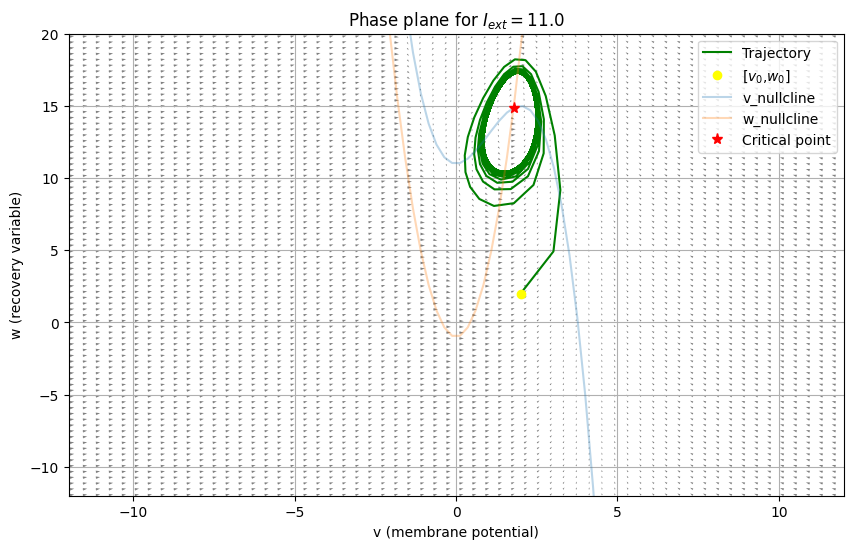

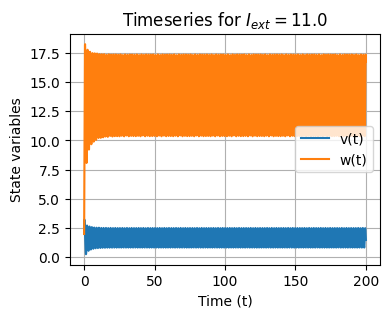

In [ ]:
params= default_pars_hr()
params['I_ext'] = 11.
init_cond = [2,2]
x,v_n,w_n=nullclines_hr(params)
cp_x,cp_y = find_critical_point_hr(params)
t = np.linspace(0,200,num=2000)
v,w = solve_hr(t,params,init_cond)
v_,w_,dv_scaled,dw_scaled=compute_vector_field_hr(params)
plot_all(x,v_n,w_n,cp_x,cp_y,v,w,v_,w_,dv_scaled,dw_scaled,init_cond,t,params['I_ext'])

### 3.2 Large external stimulus currents: $I_{ext} > 12$
Setting `I_ext` greater than **12**, the critical point is a **stable spiral** fixed point. A stable spiral is a fixed point where nearby trajectories spiral towards the point. In the phase plane below, trajectories spiral inwards towards the fixed point as they approach it.

As we can note in the second graph, both frequencies of spikes have small amplitudes.

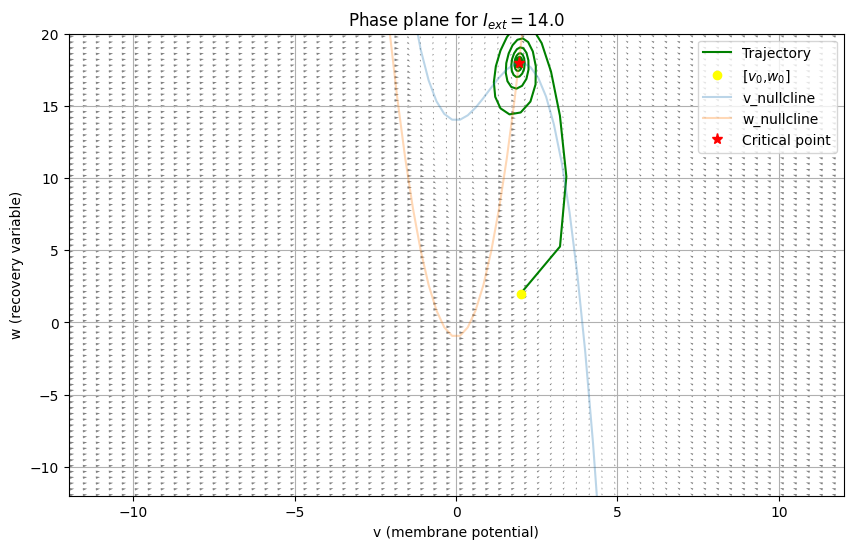

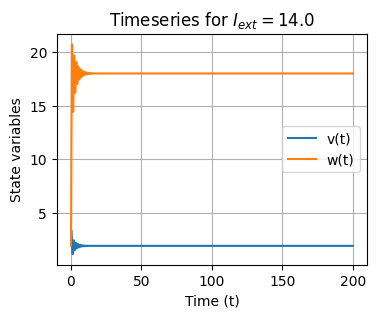

In [ ]:
params= default_pars_hr()
params['I_ext'] = 14.
init_cond = [2,2]
x,v_n,w_n=nullclines_hr(params)
cp_x,cp_y = find_critical_point_hr(params)
t = np.linspace(0,200,num=2000)
v,w = solve_hr(t,params,init_cond)
v_,w_,dv_scaled,dw_scaled=compute_vector_field_hr(params)
plot_all(x,v_n,w_n,cp_x,cp_y,v,w,v_,w_,dv_scaled,dw_scaled,init_cond,t,params['I_ext'])

### 3.3 Negative external stimulus currents: $I_{ext} < -1 $

Setting `I_ext` less than **-1**, the critical point in this case is a **stable node**. A stable node is a fixed point where nearby trajectories converge towards the point. In the phase plane below, trajectories move towards the fixed point either directly or along straight paths. In fact, `v(t)` and `w(t)` approach their stable value without oscillations (in the previous case, the approach consisted in dumped oscillations, as there was a limit cycle).

As we can note in the second graph, there is no oscillation of the frequencies. We can state with this value of `I_ext`, it is not possible to generate spikes.


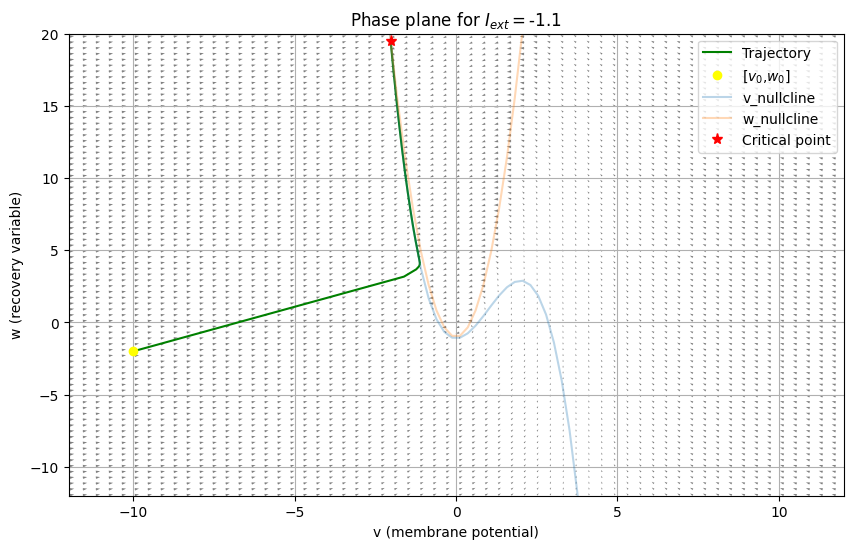

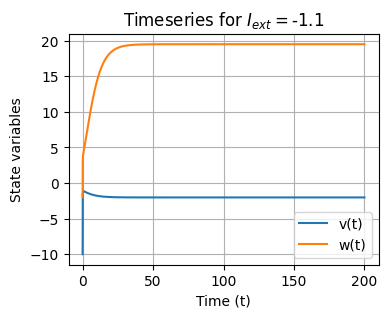

In [ ]:
params= default_pars_hr()
params['I_ext'] = -1.1
init_cond = [-10,-2]
x,v_n,w_n=nullclines_hr(params)
cp_x,cp_y = find_critical_point_hr(params)
t = np.linspace(0,200,num=2000)
v,w = solve_hr(t,params,init_cond)
v_,w_,dv_scaled,dw_scaled=compute_vector_field_hr(params)
plot_all(x,v_n,w_n,cp_x,cp_y,v,w,v_,w_,dv_scaled,dw_scaled,init_cond,t,params['I_ext'])

### 3.4 External stimulus currents absent: $I_{ext} = 0 $

Setting `I_ext` equal to **0**, the dynamics of the system represents a **stable limit cycle** . Differently from the other stable limit cycle (for values of `I_ext` > 12), in this case the critical point is outside of the cycle. The values of `v` and `w`, in fact, are initially growing towards the cycle, to then oscillate in phase between the same values.

The second graph indicates that the spike generator for both variables almost overlap.

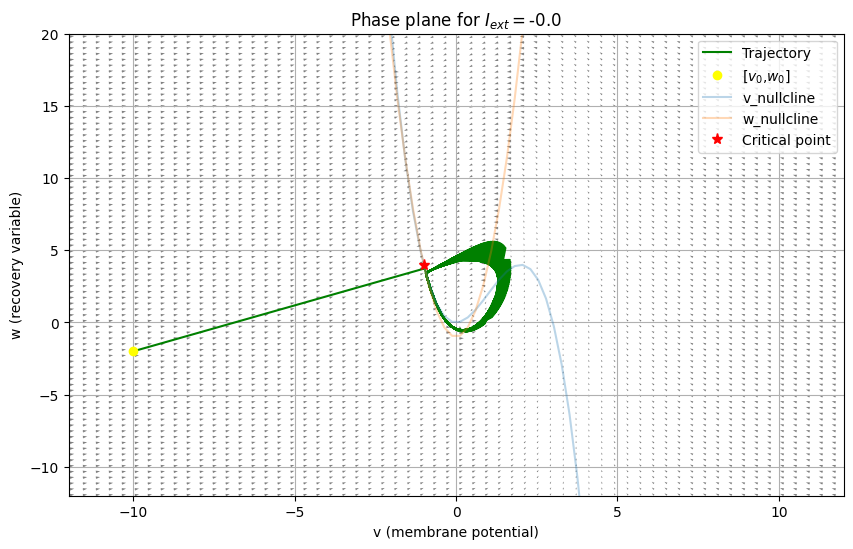

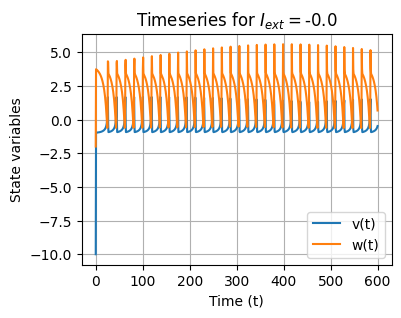

In [ ]:
params= default_pars_hr()
params['I_ext'] = -0.
init_cond = [-10,-2]
x,v_n,w_n=nullclines_hr(params)
cp_x,cp_y = find_critical_point_hr(params)
t = np.linspace(0,600,num=1000)
v,w = solve_hr(t,params,init_cond)
v_,w_,dv_scaled,dw_scaled=compute_vector_field_hr(params)
plot_all(x,v_n,w_n,cp_x,cp_y,v,w,v_,w_,dv_scaled,dw_scaled,init_cond,t,params['I_ext'])

### 3.5 External stimulus currents with values: $-1<I_{ext}<0$  and  $0<I_{ext}<0.2$:

For values of the `I_ext` in the ranges *(-1,0), (0,0.2)* is impossible to find solutions of equations and consequently to plot the trajectories. Indeed, with our limited knowledge about Dynamical Systems, we have found two possible hypothesis:
- **Singularities**: Singularities such as poles or critical points where the equations become undefined can cause difficulties in finding solutions.
- **Discontinuous Dynamics**: If the equations involve discontinuous functions or non-smooth dynamics, solutions might not exist or might not be well-defined in certain regions of the phase plane.

## 4. Response to time-dependent external stimuli $I_{ext}(t)$ - Spike accomodation

Look at how the neuron behaviour changes given an input that increases slowy or a faster one.

In [ ]:
def hr_I_slow(x,t,params,a):
    """
    Differential equation of Fitzhugh-Nagumo model (slow external input).
    x is the state vector (v,w) where v is the membrane potential and w is the recovery variable
    """
    dv_dt = - x[1] - params['a']*x[0]**3 + params['b']*x[0]**2 + a * t
    dw_dt = - params['c'] + params['d']*x[0]**2 - x[1]
    return [dv_dt,dw_dt]

def hr_I_fast(x,t,params):
    """
    Differential equation of Fitzhugh-Nagumo model (fast external input).
    x is the state vector (v,w) where v is the membrane potential and w is the recovery variable
    """

    if (t<50 or t>55):
        dv_dt = - x[1] - params['a']*x[0]**3 + params['b']*x[0]**2
    else:
        dv_dt = - x[1] - params['a']*x[0]**3 + params['b']*x[0]**2 + 0.5
    dw_dt = - params['c'] + params['d']*x[0]**2 - x[1]
    return [dv_dt,dw_dt]

def solve_hr_I_slow(t,params,init_cond,a):
    """
    Find the numerical solution for the evolution over time of the state variables v and w (slow external input).
    """
    x = odeint(hr_I_slow,init_cond,t,args=(params,a))
    v, w = x.T
    return v,w

def solve_hr_I_fast(t,params,init_cond):
    """
    Find the numerical solution for the evolution over time of the state variables v and w (fast external input).
    """
    x = odeint(hr_I_fast,init_cond,t,args=(params,))
    v, w = x.T
    return v,w

In [ ]:
def plot_I_t(x,v_n,w_n,v,w,init_cond,t):
    """
    Plot nullclines, trajectory and timeseries.
    """

    n_skip=2
    plt.figure(figsize=(6, 6))
    plt.title('Phase plane for time-dependent $I_{ext}$')
    plt.plot(v,w,color='green',label='Trajectory')
    plt.plot(init_cond[0],init_cond[1], 'o',color='yellow', label=f'[$v_0$,$w_0$]')
    plt.plot(x, v_n, label='v_nullcline',alpha=0.3)
    plt.plot(x, w_n, label='w_nullcline',alpha=0.3)
    plt.ylabel('w (recovery variable)')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.xlim(-12,12)
    plt.ylim(-12,20)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(4, 3))
    plt.title('Timeseries for for time-dependent $I_{ext}$')
    plt.plot(t, v, label='v(t)')
    plt.plot(t, w, label='w(t)')
    plt.xlabel('Time (t)')
    plt.ylabel('State variables')
    plt.xlim(0,220)
    plt.legend()
    plt.grid(True)
    plt.show()


### 4.1 $I_{ext}$ slowly increasing: $I_{ext} = 0.003t$

by gradually increasing the injected current, the trajectory initially moves away from the initial conditions, to then approach a limit cycle, without converge to the fixed point. We can notice that, as the current injected is growing in time, the amplitude of the potential oscillation is also increasing (this can be caused by the fact that the effect of the current has consequencies on the potential, but not on the open probabilities of ion channels (w)).

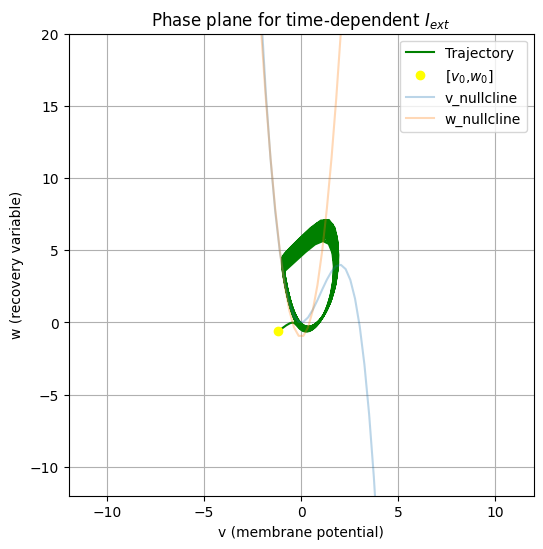

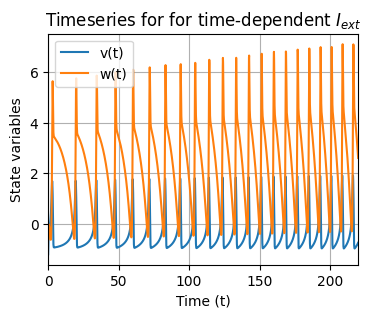

In [ ]:
params = default_pars_hr()
init_cond = [-1.19940803524404 ,-0.624260044055044]
a = 0.003
t = np.linspace(0,220,num=2000)
params['I_ext']=-0.
v,w = solve_hr_I_slow(t,params,init_cond,a)
x,v_n,w_n=nullclines_hr(params)
plot_I_t(x,v_n,w_n,v,w,init_cond,t)

### **4.2 $I_{ext}$ fastly increasing:**
$I_{ext} = 0$,  for $t<50$ and $t>55$

$I_{ext} = 0.5$,  for $50<t<55$


We can see that, if the stimulus is not growing progressively, but instead dump from 0 to 0.5, the behavior of the variables is different. Specificately, the dump causes the trajectory to shift from a limit cycle to approach a constant value.

In fact, before the dump $v$ and $w$ are oscillating with an increase in amplitude (as we can see also in the trajectory), then they diverge and approach two constant values.


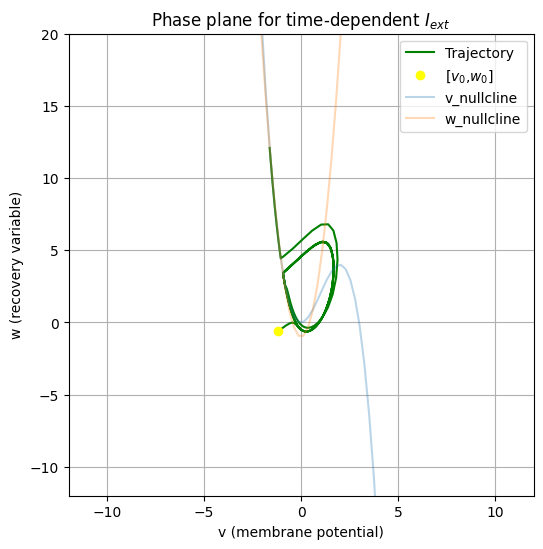

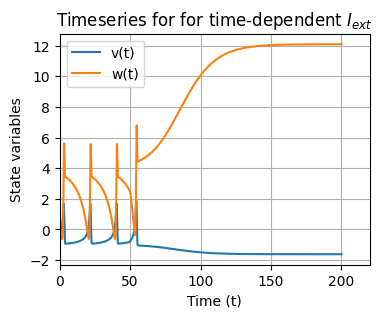

In [ ]:
params = default_pars_hr()
init_cond = [-1.19940803524404 ,-0.624260044055044]
t = np.linspace(0,200,num=2000)
params['I_ext']=-0.
v,w = solve_hr_I_fast(t,params,init_cond)
x,v_n,w_n=nullclines_hr(params)
plot_I_t(x,v_n,w_n,v,w,init_cond,t)

# **5. Final comparison**
### **5.1 Comparative Analysis of Nullclines: FitzHugh-Nagumo vs. Hindmarsh-Rose Models**

**Overview:**  
The function `plot_comparative_nullclines` is designed to simultaneously visualize the nullclines of the FitzHugh-Nagumo (FHN) and Hindmarsh-Rose (HR) models under varying external currents.

**Function Insights:**
  - Initializes and configures parameters for both FHN and HR models based on the input external current `I_ext`.
  - Calculates the nullclines, critical points, and vector fields for each model.
  - Generates comparative plots, side by side, for a clear visual contrast between the two models.

**Visualization Details:**
- The left subplot displays the nullclines and vector field for the FHN model, highlighting its critical point with a red star.
- The right subplot presents the same for the HR model, adjusted for its specific range and dynamics.
- Each plot includes nullcline curves, a vector field to indicate directionality and flow, and annotations for critical points.



**Phase plane comparison**

The two plots are obtained setting the same initial conditions of v,w and I.
The first big difference is that the nullcline of the variable w (the recovery variable) is linear in the F.N. model and quadratic in the H.R. This factor can arise more complexity in the dynamics of the latter. An example is that in the Hindmarsh Rose model we didn't individuate plane regions, and this can be caused by the fact that the domain of the w nullcline is restricted!

This can cause also the presence of more than one fixed point, but was not the case of our analysis (it depends also on the values of the parameters).

In [ ]:
from ipywidgets import interact, FloatSlider

def plot_comparative_nullclines(I_ext_fhn, I_ext_hr):
    # Setup for FitzHugh-Nagumo model
    params_fn = default_pars_fn(I_ext=I_ext_fhn)
    x_fn, v_n_fn, w_n_fn = nullclines_fn(params_fn)
    cp_x_fn, cp_y_fn = find_critical_point_fn(params_fn)
    v_fn, w_fn, dv_scaled_fn, dw_scaled_fn = compute_vector_field_fn(params_fn)

    # Setup for Hindmarsh-Rose model
    params_hr = default_pars_hr(I_ext=I_ext_hr)
    x_hr, v_n_hr, w_n_hr = nullclines_hr(params_hr)
    cp_x_hr, cp_y_hr = find_critical_point_hr(params_hr)
    v_hr, w_hr, dv_scaled_hr, dw_scaled_hr = compute_vector_field_hr(params_hr)

    # Set up the figure layout for comparative plots
    plt.figure(figsize=(12, 6))

    # Plotting the nullclines for FitzHugh-Nagumo
    plt.subplot(1, 2, 1)
    plt.title('FitzHugh-Nagumo')
    plt.plot(x_fn, v_n_fn, label='v_nullcline')
    plt.plot(x_fn, w_n_fn, label='w_nullcline')
    plt.quiver(v_fn[::2, ::2], w_fn[::2, ::2], dv_scaled_fn[::2, ::2], dw_scaled_fn[::2, ::2], angles='xy', scale_units='xy', scale=1, color='gray', width=0.0023)
    plt.plot(cp_x_fn, cp_y_fn, 'r*', markersize=8, label='Critical point')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-2, 3)

    # Plotting the nullclines for Hindmarsh-Rose
    plt.subplot(1, 2, 2)
    plt.title('Hindmarsh-Rose')
    plt.plot(x_hr, v_n_hr, label='v_nullcline')
    plt.plot(x_hr, w_n_hr, label='w_nullcline')
    plt.quiver(v_hr[::2, ::2], w_hr[::2, ::2], dv_scaled_hr[::2, ::2], dw_scaled_hr[::2, ::2], angles='xy', scale_units='xy', scale=1, color='gray', width=0.0023)
    plt.plot(cp_x_hr, cp_y_hr, 'r*', markersize=8, label='Critical point')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlim(-12, 6)
    plt.ylim(-6, 20)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Interactive sliders for external current I_ext
interact(plot_comparative_nullclines,
         I_ext_fhn=FloatSlider(value=0.5, min=-2, max=2, step=0.1, continuous_update=False, description='I_ext FHN'),
         I_ext_hr=FloatSlider(value=0.5, min=-2, max=2, step=0.1, continuous_update=False, description='I_ext HR'))


interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='I_ext FHN', max=2.0, min=-2…

<function __main__.plot_comparative_nullclines(I_ext_fhn, I_ext_hr)>

### **5.2 Comparative Trajectory Analysis: FitzHugh-Nagumo vs. Hindmarsh-Rose Models**

**Overview:**  
The following function simulate and compare the trajectories of two distinct neuron models: FitzHugh-Nagumo (FHN) and Hindmarsh-Rose (HR). This comparison elucidates the dynamic responses of each model to initial conditions and external stimuli.

**Function Insights:**
  - Initializes parameters for both FHN and HR models, taking into account the external current `I_ext` and initial conditions `[v0, w0]`.
  - Utilizes the `solve_fn` function for FHN and `solve_hr` function for HR to compute the trajectories over time.
  - Produces a vertically stacked subplot for each model, plotting the phase plane trajectories and marking the initial conditions.

**Visualization Details:**
- The FHN model's trajectory is displayed in the top subplot, with the initial condition marked as a red dot.
- The HR model's trajectory is depicted in the bottom subplot, similarly showcasing its path starting from the initial condition.
- Each subplot is equipped with axis labels, a legend, grid lines, and appropriate axis limits for clarity.



**Trajectories comparison**

By setting the same initial conditions, the two models exhibit very different behaviours. The F.N. model's trajectory presents a convergence to a fixed point, that is consequently an attractive stable fixed point.
In the H.R. model the trajectory won't converge to a fixed point, entering in a limit cycle.

This means that in the first model after some time the current will approach a constant value, while in the second the current will oscillate between the values of the cycle.

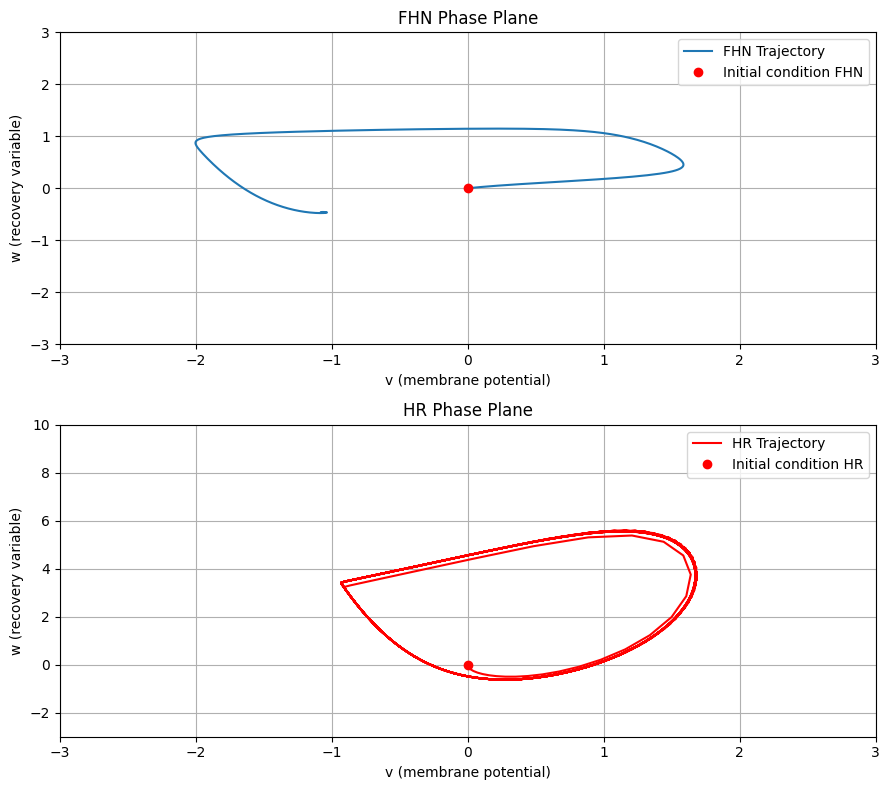

In [ ]:
def plot_comparative_trajectories_all(v0_fhn, w0_fhn, I_ext_fhn, v0_hr, w0_hr, I_ext_hr):
    # Initialize parameters for the models with given external current
    params_fhn = default_pars_fn(I_ext=I_ext_fhn)
    params_hr = default_pars_hr(I_ext=I_ext_hr)

    t = np.linspace(0, 200, num=2000)
    v_fhn, w_fhn = solve_fn(t, params_fhn, [v0_fhn, w0_fhn])
    v_hr, w_hr = solve_hr(t, params_hr, [v0_hr, w0_hr])

    # Set up the figure layout for comparative plots
    plt.figure(figsize=(9, 8))

    # Plotting the trajectory for FitzHugh-Nagumo
    plt.subplot(2, 1, 1)  # Aggiustato per due subplot in verticale
    plt.title('FHN Phase Plane')
    plt.plot(v_fhn, w_fhn, label='FHN Trajectory')
    plt.plot(v0_fhn, w0_fhn, 'o', color='r', label=f'Initial condition FHN')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend()
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    # Plotting the trajectory for Hindmarsh-Rose
    plt.subplot(2, 1, 2)
    plt.title('HR Phase Plane')
    plt.plot(v_hr, w_hr, color='r', label='HR Trajectory')
    plt.plot(v0_hr, w0_hr, 'o', color='r', label=f'Initial condition HR')
    plt.xlabel('v (membrane potential)')
    plt.ylabel('w (recovery variable)')
    plt.legend()
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-3, 10)  # Aggiustato range dell'asse y per HR

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example call of the function with initial values and external current for both models
plot_comparative_trajectories_all(0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
